# IESB - CIA035 - Aula 14 - MNIST Neural Net

In [1]:
# Importando as bibliotecas
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
# As tranformações que serão aplicadas a cada imagem
# No caso elas serão convertidas em tensores e nornalizadas
image_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.5,), (0.5,))])

In [3]:
# Baixando o dataset de treino e teste
# Aplica as transformações nas imagens de treino e de teste
# Os dados são carregados junto com seus labels (o nome de cada pasta)
traindata = datasets.MNIST('data', download=True, train=True, transform=image_transform)
testdata = datasets.MNIST('data', download=True, train=False, transform=image_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
# Carregando as imagens de treino e teste
# O batch_size determina o tamanho do conjunto de dados a ser aplicado a rede em cada foward propagation
trainloader = torch.utils.data.DataLoader(traindata, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testdata, batch_size=128, shuffle=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


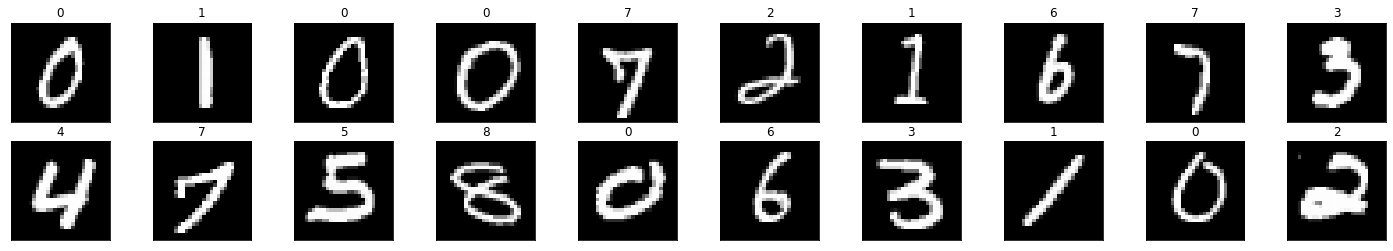

In [5]:
# Obtendo um batch das imagens de treino
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

# Plotando as imagens do batch, com seus labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # Pega o label correto da imagem
    # .item() pega o valor do Tensor
    ax.set_title(str(labels[idx].item()))

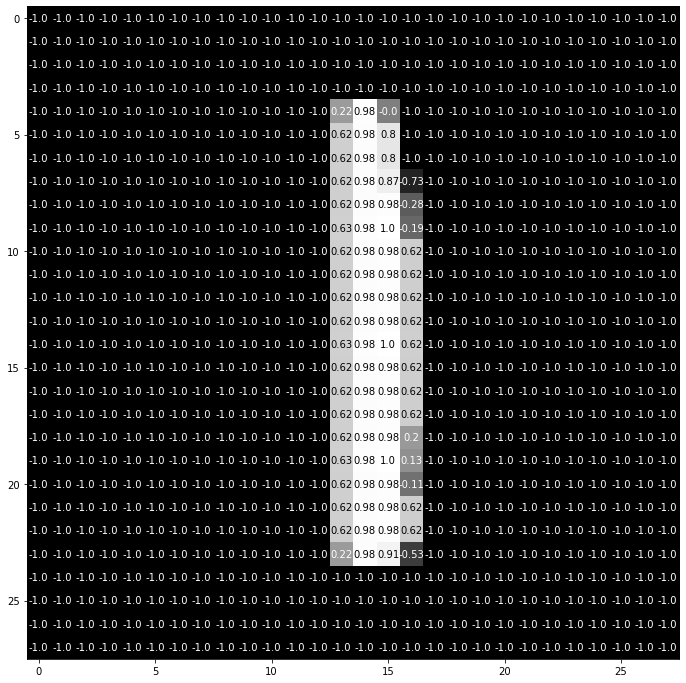

In [6]:
# Cada imagem tem tamanho 28 x 28, o que significa que as imagens têm 784 pixels
# Cada pixel será representado por sua intensidade, maior ou menor, de branco

# Esse código representa a imagem como ela será vista pela entrada da Rede Neural
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [7]:
# Definindo uma rede neural (fully connected)
# Input layer: 784 entradas (tamanho da imagem: 28x28) -> 512 saídas (arbitrário/definido por nós)
# Hideen layer: 512 entradas (combinando com as saídas da camada anterior) -> 256 saídas (arbitrário/definido por nós)
# Output layer: 256 entradas (combinando com as saídas da camada anterior) - 10 saídas (De 0 a 9)

# Criando a rede neural usando nn.Sequential
model = nn.Sequential(nn.Linear(784, 512),
                      nn.ReLU(),
                      nn.Linear(512, 256),
                      nn.ReLU(),
                      nn.Linear(256, 10))

model

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
)

In [8]:
# Temos que definir a função de erro e o otimizador (que vai alterar os pesos dos perceptrons)
error_function = nn.CrossEntropyLoss() # criterion
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [9]:
# Treinamento do modelo

# Definindo o número de épocas
epochs = 10

# Colocando o modelo em modo de treinamento
model.train()


# For para rodar o número de épocas
for i in range(epochs):
    # Treinamento
    
    # Monitorando o training loss
    train_loss = 0.0
    
    # Obtendo dados e respostas
    for data, target in trainloader:
    
        # Foward Propagation (passando os dados de treino pela rede)
        # Para usar uma rede linear é preciso transformar a imagem
        # em um vetor de 1 dimensão
        outputs = model.forward(data.view(-1, 784))
        # Calculando o erro
        loss = error_function(outputs, target)
       
        # Back Propagation
        # Limpar os parametros do otimizador (zerar o Gradiente Descendent)
        optimizer.zero_grad()
        # Calcular os novos pesos
        loss.backward()
        # Executar o optimizador (efetivamente fazer o back propagation mudando os pesos)
        optimizer.step()
        
        # Atualizando o training loss
        train_loss += loss.item() * data.size(0)
        
    # Calculando a média de erro por epoch
    train_loss = train_loss/len(trainloader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(i+1, train_loss))

Epoch: 1 	Training Loss: 0.338981
Epoch: 2 	Training Loss: 0.141783
Epoch: 3 	Training Loss: 0.101882
Epoch: 4 	Training Loss: 0.080062
Epoch: 5 	Training Loss: 0.067566
Epoch: 6 	Training Loss: 0.060035
Epoch: 7 	Training Loss: 0.051655
Epoch: 8 	Training Loss: 0.045807
Epoch: 9 	Training Loss: 0.040248
Epoch: 10 	Training Loss: 0.037457


In [10]:
# Variaveis para controlar os acertos das previsões da rede
# e  calcular a acurácia
correct = 0
total = 0

# Vamos colocar o modelo em modo de avaliação/teste
model.eval()

# Obtendo dados e respostas
for data, target in testloader:
    output = model(data.view(-1,784))
    
    for index, i in enumerate(output):
        if torch.argmax(i) == target[index]:
            correct += 1
        total += 1

In [11]:
print('Accuracy: ', round(correct/total, 3))

Accuracy:  0.976


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


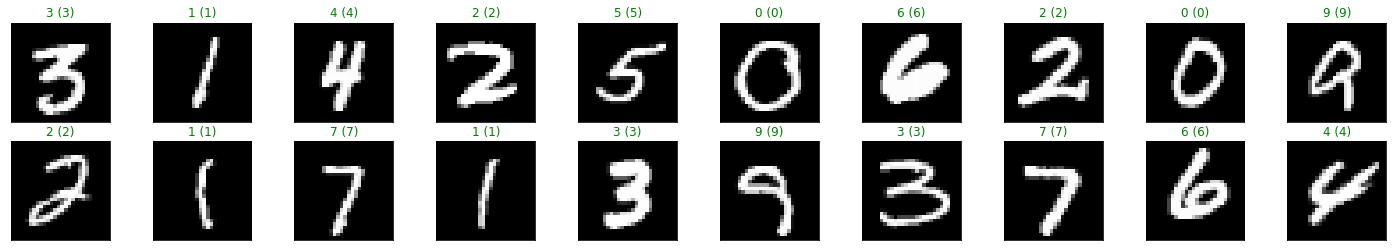

In [12]:
# Vamos exibir os resultados das nossas previsões

# Obtendo um batch das imagens de teste
dataiter = iter(testloader)
images, labels = dataiter.next()

# Obtendo as previsões
output = model(images.view(-1, 784))
# Convertendo as probabilidades na classe específica
_, preds = torch.max(output, 1)
# Preparando a imagem para exibir
images = images.numpy()

# Mostra a imagem com a previsão e o valor real: previsão (real)
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))